#### Impedindo notebook de escrever bytecode

In [1]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [2]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [3]:

from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier
from random import choices
import pandas as pd
import matplotlib.pyplot as plt

#### Lendo dataset

In [4]:
dataset = PointDataset("./data.dat", labelTranslation={"1": 1, "0": -1}, valueTranslation={"Present": 1, "Absent": -1})
points = dataset.getPoints()

#### Criando instância do classificador baseado em envoltória convexa para as features (0, 1)

In [5]:
CHclf01 = ConvexHullClassifier(points, coordinate1=0, coordinate2=1, nFolds=5)
CHresults01 = CHclf01.run()

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)


#### Plotando classificador

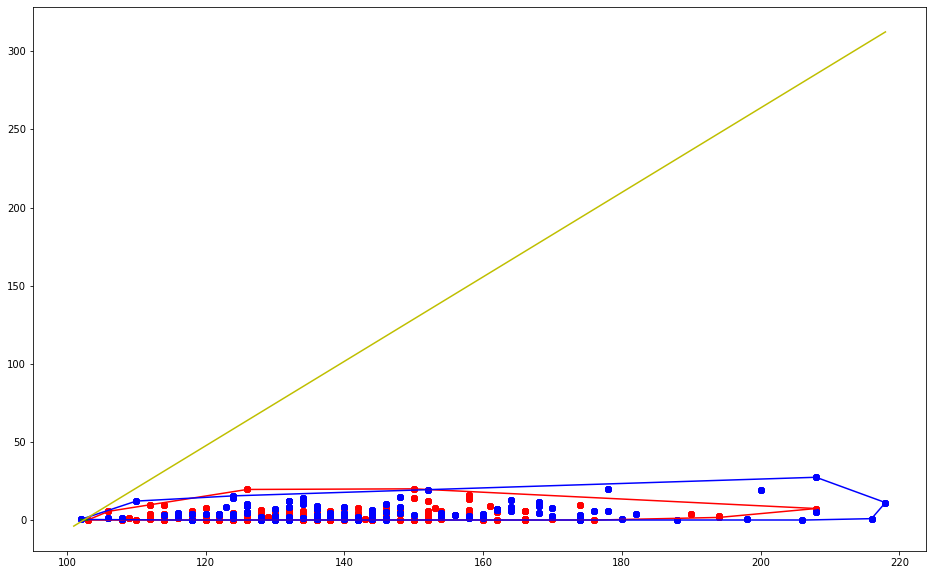

In [6]:
CHclf01.plotHulls()

#### Verificando separabilidade linear dos pontos

In [7]:
CHclf01.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [8]:
CHresults01["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,NaN,0.000000,NaN,0.640625
1,NaN,0.000000,NaN,0.671875
2,NaN,0.000000,NaN,0.656250
3,NaN,0.000000,NaN,0.718750
4,1.0,0.043478,1.0,0.656250


#### Resultados do teste

In [9]:
CHresults01["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.0,0.0,NaN,0.618705


#### Criando instância do classificador baseado em envoltória convexa para as features (0, 2)

In [10]:
CHclf02 = ConvexHullClassifier(points, coordinate1=0, coordinate2=2, nFolds=5)
CHresults02 = CHclf02.run()

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)


#### Plotando classificador

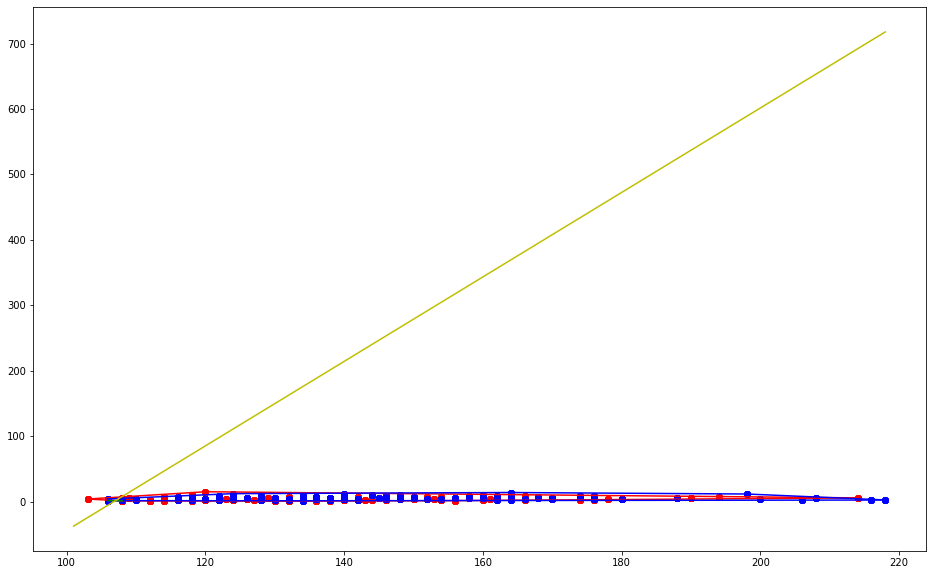

In [11]:
CHclf02.plotHulls()

#### Verificando separabilidade linear dos pontos

In [12]:
CHclf02.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [13]:
CHresults02["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,NaN,0.000000,NaN,0.718750
1,0.5,0.043478,0.5,0.640625
2,0.0,0.000000,NaN,0.640625
3,0.0,0.000000,NaN,0.609375
4,1.0,0.047619,1.0,0.687500


#### Resultados do teste

In [14]:
CHresults02["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.5,0.019608,0.5,0.633094


#### Criando instância do classificador baseado em envoltória convexa para as features (1, 2)

In [15]:
CHclf12 = ConvexHullClassifier(points, coordinate1=1, coordinate2=2, nFolds=5)
CHresults12 = CHclf12.run()

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \


#### Plotando classificador

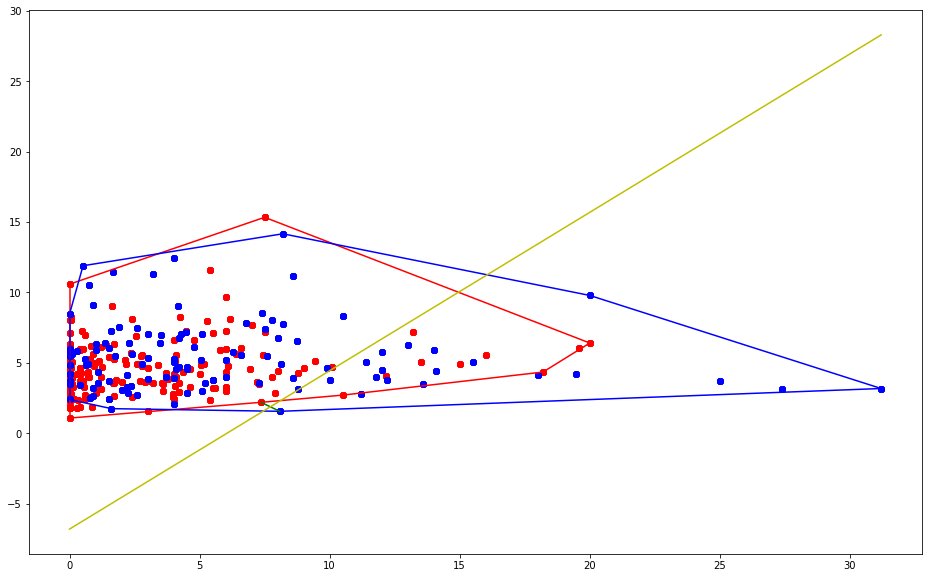

In [16]:
CHclf12.plotHulls()

#### Verificando separabilidade linear dos pontos

In [17]:
CHclf12.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [18]:
CHresults12["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.366667,0.578947,0.366667,0.578125
1,NaN,0.000000,NaN,0.593750
2,NaN,0.000000,NaN,0.703125
3,NaN,0.000000,NaN,0.656250
4,NaN,0.000000,NaN,0.625000


#### Resultados do teste

In [19]:
CHresults12["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,NaN,0.0,NaN,0.647482


#### Criando instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [20]:
KNNclf = KNNClassifier(points, maxK=30, nFolds=5)
KNNresults = KNNclf.run()

#### Resultados da validação cruzada com 5 folds

In [21]:
KNNresults["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.733333,0.423077,0.733333,0.703125
1,1.000000,0.370370,1.000000,0.734375
2,0.352941,0.352941,0.352941,0.656250
3,0.818182,0.409091,0.818182,0.765625
4,0.615385,0.333333,0.615385,0.671875


#### Resultados do teste

In [22]:
KNNresults["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.366667,0.261905,0.366667,0.640288
